In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
data1 = pd.read_csv('merged_recipes_reviews.csv', header='infer', sep=',')
data = data1.drop(['review_count', 'id', 'date', 'text'], axis=1, errors='ignore')
display(data.isna().sum())
data


,0
title,0
rating,0
readyInMinutes,0
vegetarian,0
veryPopular,0
healthScore,0
pricePerServing,0
ingredients,0


,title,rating,readyInMinutes,vegetarian,veryPopular,healthScore,pricePerServing,ingredients
0,Best Buffalo Chicken Chili,5,45,False,False,39.0,246.89,"['black beans', 'tomato sauce', 'carrots', 'ce..."
1,Best Buffalo Chicken Chili,5,45,False,False,39.0,246.89,"['black beans', 'tomato sauce', 'carrots', 'ce..."
2,Best Buffalo Chicken Chili,4,45,False,False,39.0,246.89,"['black beans', 'tomato sauce', 'carrots', 'ce..."
3,Best Buffalo Chicken Chili,5,45,False,False,39.0,246.89,"['black beans', 'tomato sauce', 'carrots', 'ce..."
4,Best Buffalo Chicken Chili,5,45,False,False,39.0,246.89,"['black beans', 'tomato sauce', 'carrots', 'ce..."
...,...,...,...,...,...,...,...,...
30540,Cantaloupe Soup With Crispy Ham and Basil,5,45,False,False,5.0,86.32,"['several basil leaves', 'sized cantaloupe', '..."
30541,Cantaloupe Soup With Crispy Ham and Basil,5,45,False,False,5.0,86.32,"['several basil leaves', 'sized cantaloupe', '..."
30542,Cantaloupe Soup With Crispy Ham and Basil,5,45,False,False,5.0,86.32,"['several basil leaves', 'sized cantaloupe', '..."
30543,Cantaloupe Soup With Crispy Ham and Basil,5,45,False,False,5.0,86.32,"['several basil leaves', 'sized cantaloupe', '..."


Поскольку столбцы review_count, id, date, text не несут информации для дальнейшего анализа (в столбце review_count все значения равны 100, столбец id дублирует title), мы удалили их из датасета.

Далее мы группируем датасет по названию рецепта и используем агрегирующую функцию mean() для расчета среднего рейтинга по всем отзывам для каждого блюда().

In [45]:
# Группировка по названию блюда и расчет среднего рейтинга
df = data.groupby(['title', 'readyInMinutes', 'vegetarian',
                               'veryPopular', 'healthScore', 'pricePerServing',
                               'ingredients'])['rating'].mean().reset_index()
display(df)

,title,readyInMinutes,vegetarian,veryPopular,healthScore,pricePerServing,ingredients,rating
0,(Lighter) Classic Eggplant Parmigiana,45,False,False,33.0,202.24,"['canned tomatoes', 'eggplants', 'extra virgin...",4.70
1,5 Minute Gluten Free Wonder Buns,45,True,False,7.0,93.69,"['almond meal', 'baking powder', 'cocoa powder...",4.62
2,A Taste Of Utica St. Joseph's Bread,45,False,False,2.0,31.53,"['warm water', 'active yeast', 'butter', 'suga...",3.80
3,All Day Simple Slow-Cooker FALL OFF the BONE Ribs,45,False,False,2.0,153.49,"['slabs of pork ribs', 'broth', ""bbq sauce *i ...",4.94
4,Andouille Sausage and Potato Hash,45,False,False,21.0,130.72,"['yukon gold potato', 'bell pepper', 'bell pep...",4.72
...,...,...,...,...,...,...,...,...
306,Yogurt Parfait,15,True,False,36.0,282.40,"['cereal', 'fruit', 'mint', 'honey', 'non fat ...",4.71
307,"You’ll Flip for These Skinny Frozen S’mores, N...",45,False,False,0.0,20.76,"['full honey maid honey graham cracker', 'mars...",4.72
308,Zucchini Pineapple Muffins,45,True,False,6.0,40.51,"['baking powder', 'baking soda', 'brown sugar'...",4.74
309,Zucchini Rice,45,True,False,38.0,105.01,"['long grained rice', 'garlic', 'onion', 'oliv...",4.15


# **Univariate analysis**

## Анализ названия блюд

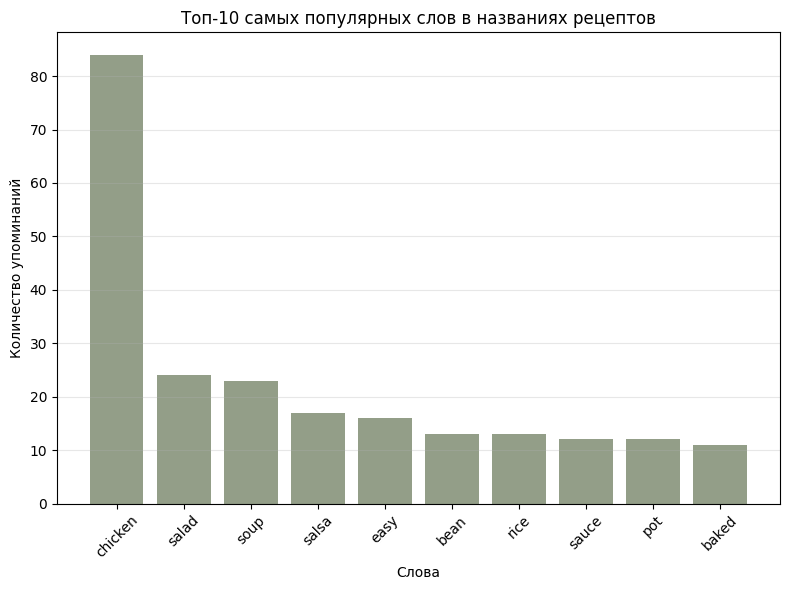

In [46]:
words = ' '.join(df['title'].dropna()).lower().split()
words = [w for w in words if w not in ['and', 'with', 'the', 'a', 'an', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'by']]

counts = {}
for w in words:
    counts[w] = counts.get(w, 0) + 1

top_words = sorted(counts.items(), key=lambda x: -x[1])[:10]

plt.figure(figsize=(8, 6))
plt.bar(*zip(*top_words), color='#78866b', alpha=0.8)
plt.title('Топ-10 самых популярных слов в названиях рецептов')
plt.xlabel('Слова')
plt.ylabel('Количество упоминаний')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

**Основные выводы:**

1. Доминирование базовых ингредиентов - слова "chicken", "cheese", "rice" указывают на большое количество рецептов из простых и доступных продуктов в кулинарии.

2. Также можно отметить преобладание коротких, простых слов, это говорит о том, что названия рецептов ориентированы на быстрое понимание и доступность

3. Отсутствие сложной терминологии - в топе нет специализированных кулинарных терминов, что делает рецепты более доступными для широкой аудитории

4. Преобладание полезной пищи - наличие таких слов как "salad", "bean", "rice" свидетельствует о распространенности здорового питания и сбалансированных блюд.

Этот график показывает, что наиболее большинство рецептов имеют простые, понятные названия с акцентом на основные ингредиенты, что делает их привлекательными для домашнего приготовления.

# Анализ времени приготовления

In [47]:
value_counts1 = df['readyInMinutes'].value_counts()
display(value_counts1)

,count
readyInMinutes,
45,223
30,33
25,9
20,9
15,9
60,5
35,2
5,2
120,2


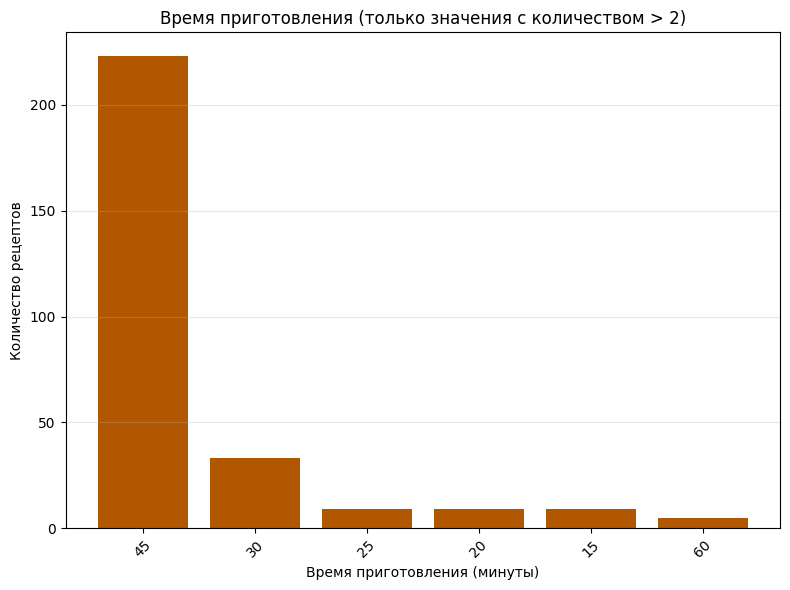

In [48]:
filtered_counts = value_counts1[value_counts1 > 2]

plt.figure(figsize=(8, 6))
plt.bar(filtered_counts.index.astype(str), filtered_counts.values, color='#B15700')
plt.title('Время приготовления (только значения с количеством > 2)')
plt.xlabel('Время приготовления (минуты)')
plt.ylabel('Количество рецептов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Проанализировав данные, мы видим чёткий тренд: большинство рецептов требуют на приготовление до 45 минут.

Этого достаточно, чтобы приготовить полноценное и вкусное блюдо, поэтому получается, что 45 минут — это идеальный баланс между вкусом и практичностью.

# Анализ бинарных признаков

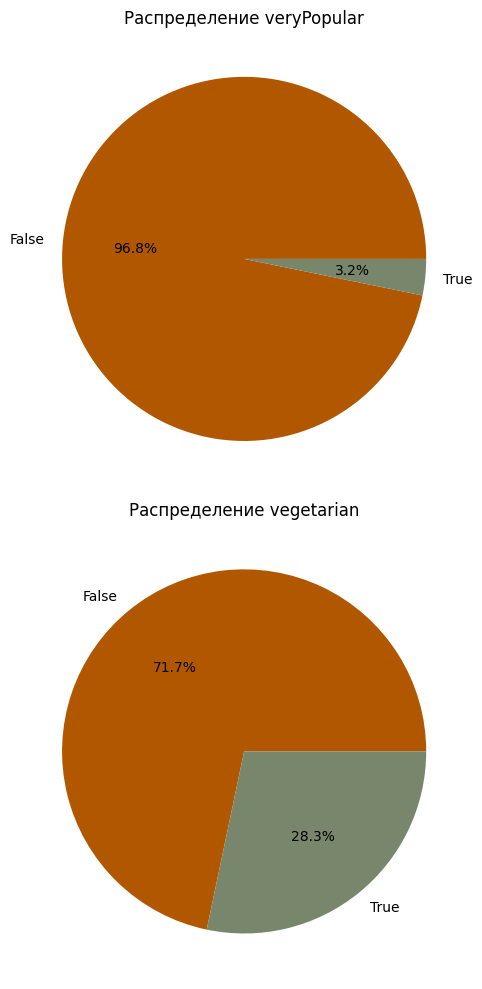

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

df['veryPopular'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1, colors=['#B15700', '#78866b'])
ax1.set_ylabel('')
ax1.set_title('Распределение veryPopular')

df['vegetarian'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2, colors=['#B15700', '#78866b'])
ax2.set_ylabel('')
ax2.set_title('Распределение vegetarian')

plt.tight_layout()
plt.show()

**Распределение блюд:**

3,2% блюд являются очень популярными - лишь небольшая часть рецептов получает статус "очень популярных". Соотвественно, на сайте есть несколько топовых рецептов, которые являются оптимальными для пользователей, однако большинство рецептов приложения не так сильно привлекают внимание пользователей. Скорее всего, они не являются достаточно оптимальнымм для домашней готовки, поэтому остаются в тени.

71,7% блюд не вегетарианские - традиционные блюда с мясом/рыбой преобладают над вегетарианскими.

**Основные выводы**

Нишевость вегетарианских рецептов - несмотря на хорошее качество, они составляют меньшинство в общей базе


# Анализ коэффициента полезности блюда

In [50]:
value_counts2 = df['healthScore'].value_counts()
display(value_counts2)

,count
healthScore,
0.0,16
2.0,13
8.0,11
24.0,10
35.0,10
...,...
61.0,1
78.0,1
85.0,1


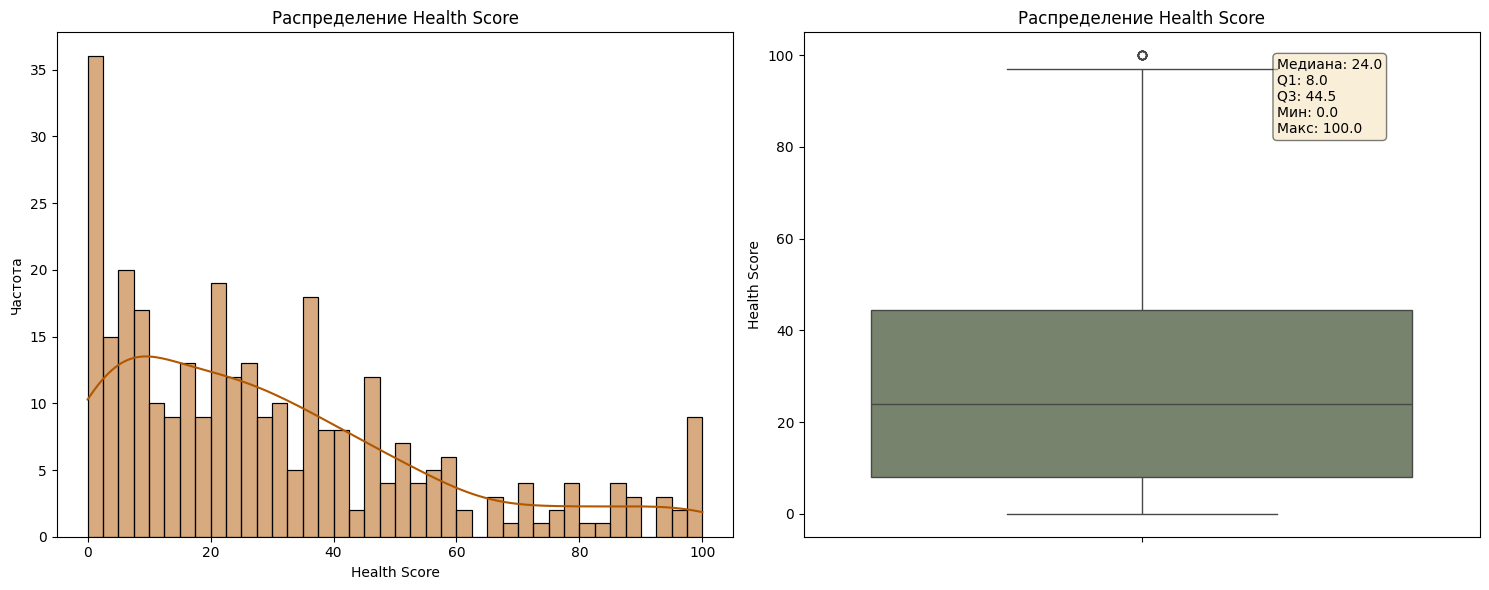

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df, x='healthScore', kde=True, bins=40, color='#B15700', ax=ax1)
ax1.set_title('Распределение Health Score')
ax1.set_xlabel('Health Score')
ax1.set_ylabel('Частота')

sns.boxplot(data=df, y='healthScore', color='#78866b', ax=ax2)
ax2.set_title('Распределение Health Score')
ax2.set_ylabel('Health Score')


stats = df['healthScore'].describe()
ax2.text(0.7, 0.95, f"Медиана: {stats['50%']:.1f}\n"
                     f"Q1: {stats['25%']:.1f}\n"
                     f"Q3: {stats['75%']:.1f}\n"
                     f"Мин: {stats['min']:.1f}\n"
                     f"Макс: {stats['max']:.1f}",
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [52]:
(df['healthScore']==0).sum()

np.int64(16)

Из графика видно, что в приложении преобладают рецепты с низким показателем полезности. Это можно объяснить тем, что менее полезная пища часто кажется пользователям более привлекательной и вкусной.

Однако сайт предлагает немалое количество блюд, имеющих максимальный коэффициент полезности, что можно объяснить тенденцией на здоровый образ жизни.

Исходя из анализа боксплота, в основном показатель HelthScore принимает значения от 8 до 44,5, что говорит о распространенности более неполезных блюд.

# Анализ стоимости порции блюда

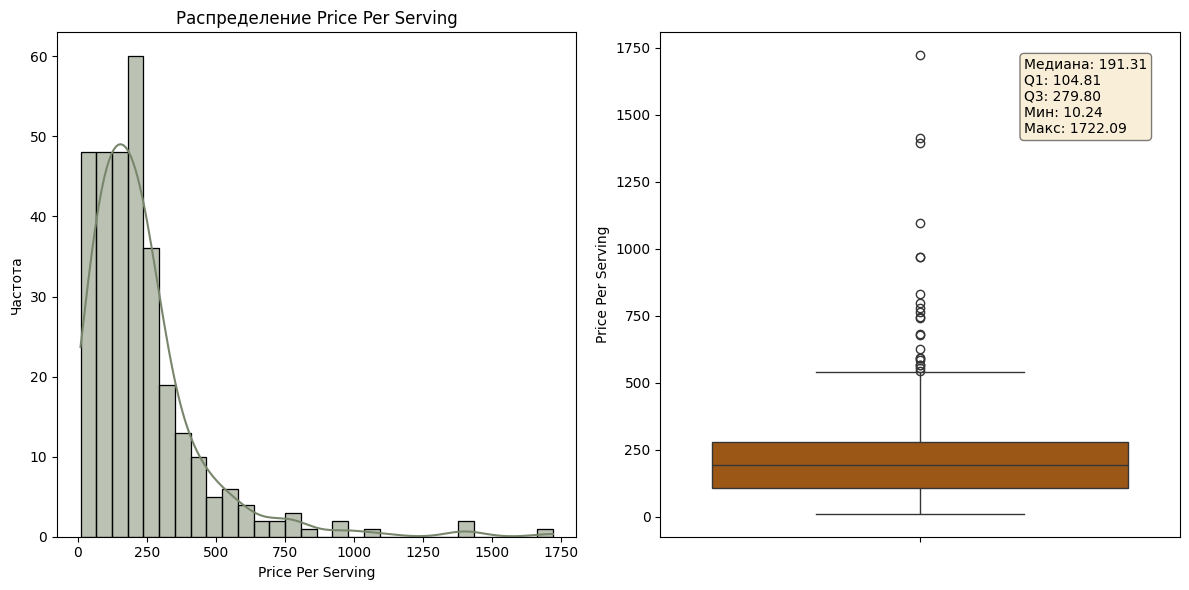

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='pricePerServing', kde=True, bins=30, color='#78866b', ax=ax1)
ax1.set_title('Распределение Price Per Serving')
ax1.set_xlabel('Price Per Serving')
ax1.set_ylabel('Частота')

sns.boxplot(data=df, y='pricePerServing',color='#B15700', ax=ax2)

ax2.set_ylabel('Price Per Serving')

stats = df['pricePerServing'].describe()
ax2.text(0.7, 0.95, f"Медиана: {stats['50%']:.2f}\n"
                     f"Q1: {stats['25%']:.2f}\n"
                     f"Q3: {stats['75%']:.2f}\n"
                     f"Мин: {stats['min']:.2f}\n"
                     f"Макс: {stats['max']:.2f}",
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


**Основные выводы:**

Концентрация в бюджетном сегменте — большинство рецептов имеют стоимость порции ниже 300 рублей, что демонстрирует ориентацию базы на доступное питание.

Умеренная ценовая вилка — 50% всех рецептов сосредоточены в диапазоне от 105 до 280 рублей за порцию, что отражает сбалансированность ценового предложения.

Широкий ценовой охват — наличие рецептов как бюджетной категории (от 10 рублей), так и премиального сегмента (до 1700 рублей) обеспечивает разнообразие выбора для разных потребительских возможностей.

Практическая ориентированность — медианное значение 191 рубль подтверждает, что база рецептов в основном состоит из экономически доступных вариантов для повседневного приготовления.

# Анализ состава блюд

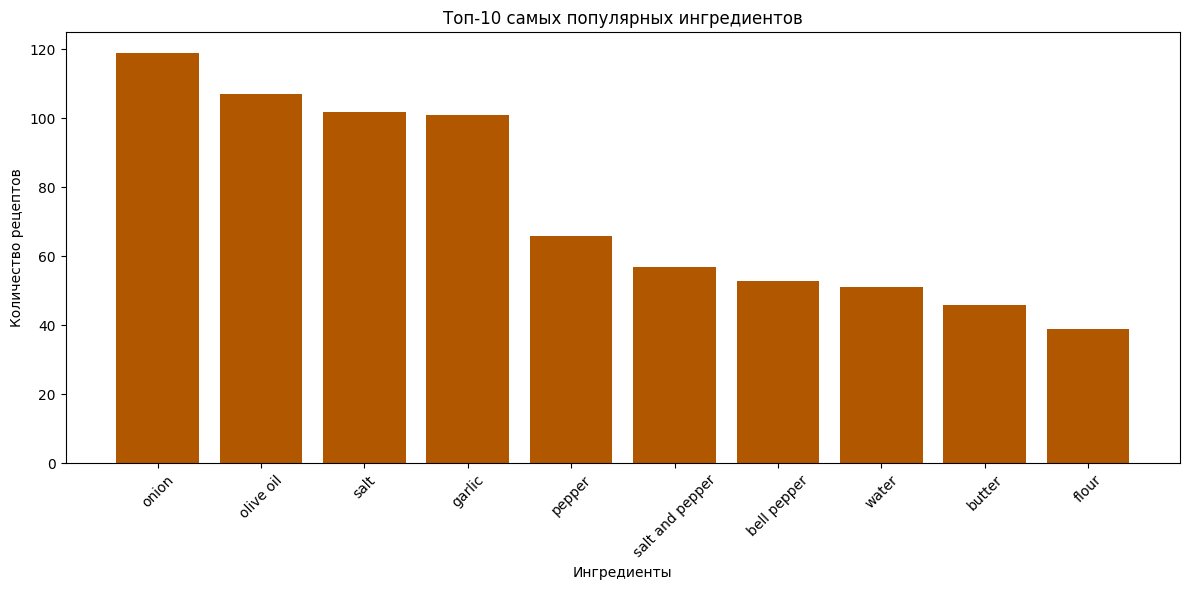

In [54]:
all_ingredients = []
for ingredients_list in df['ingredients']:
    if isinstance(ingredients_list, str):
        all_ingredients.extend(eval(ingredients_list))

counts = {}
for ing in all_ingredients:
    counts[ing] = counts.get(ing, 0) + 1

top_10 = sorted(counts.items(), key=lambda x: -x[1])[:10]

plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_10), color='#B15700')
plt.title('Топ-10 самых популярных ингредиентов')
plt.xlabel('Ингредиенты')
plt.ylabel('Количество рецептов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Основные выводы:**

Статистическое преобладание базовых продуктов — высокая частотность таких ингредиентов, как оливковое масло, соль, чеснок, перец и растительное масло, отражает их фундаментальную роль в кулинарной базе сайта*. Эти продукты составляют основу большинства представленных рецепто.

Универсальность применения — преобладание ингредиентов, которые являются межкухонными и подходят для различных стилей приготовления, показывает ориентацию базы рецептов на широкую аудиторию с разными вкусовыми предпочтениями.

Доступность как ключевой принцип — популярные ингредиенты отличаются легкой доступностью и не требуют специальных поисков, что делает базу рецептов практичной и удобной для ежедневного использования.

Кулинарная прагматикa — состав топа ингредиентов демонстрирует, что коллекция рецептов в основном состоит из блюд, основанных на простых,  основном состоит из блюд, основанных на простых, проверенных и легко доступных продуктах, что соответствует запросу на понятные и воспроизводимые кулинарные решения.

# Анализ рейтинга рецептов

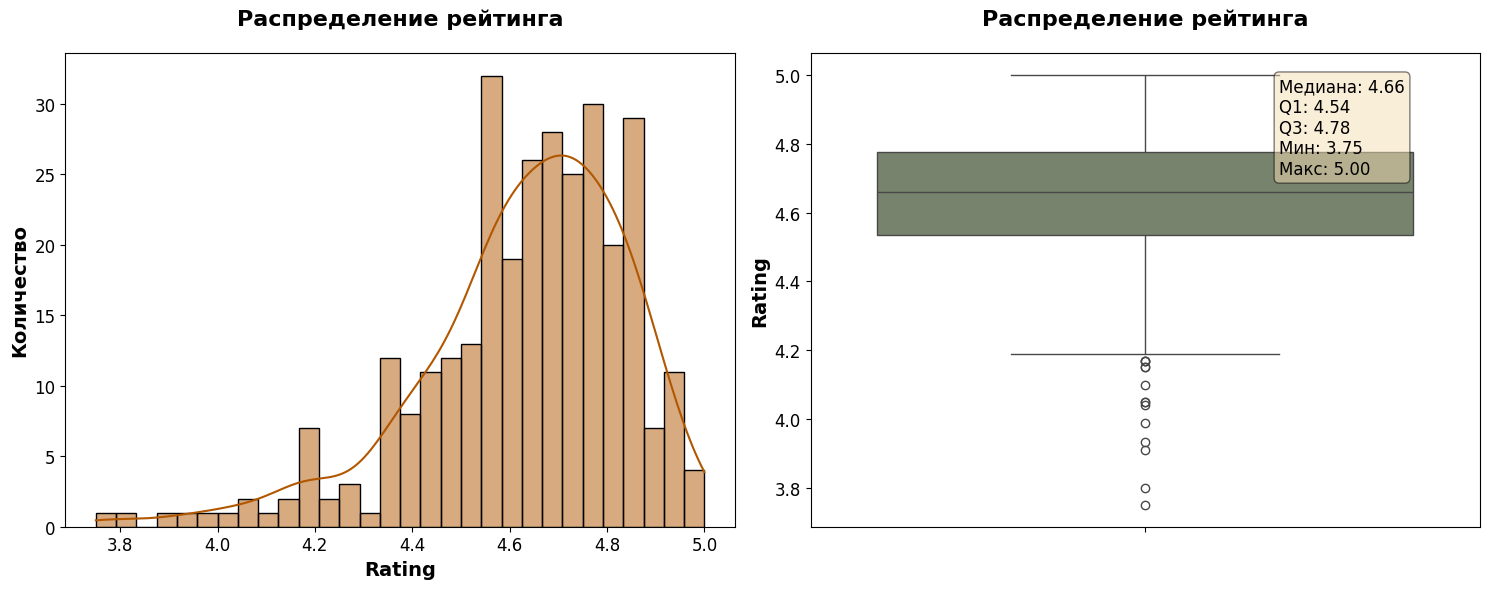

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df, x='rating', kde=True, bins=30, color='#B15700', ax=ax1)
ax1.set_title('Распределение рейтинга', fontsize=16, weight='bold', pad=20)
ax1.set_xlabel('Rating', fontsize=14, weight='bold')
ax1.set_ylabel('Количество', fontsize=14, weight='bold')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

sns.boxplot(data=df, y='rating', color='#78866b', ax=ax2)
ax2.set_title('Распределение рейтинга', fontsize=16, weight='bold', pad=20)
ax2.set_ylabel('Rating', fontsize=14, weight='bold')
ax2.tick_params(axis='y', labelsize=12)

stats = df['rating'].describe()
ax2.text(0.7, 0.95, f"Медиана: {stats['50%']:.2f}\n"
                     f"Q1: {stats['25%']:.2f}\n"
                     f"Q3: {stats['75%']:.2f}\n"
                     f"Мин: {stats['min']:.2f}\n"
                     f"Макс: {stats['max']:.2f}",
         transform=ax2.transAxes, verticalalignment='top', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

**Основные выводы:**

Концентрация высоких оценок — подавляющее большинство рецептов имеют рейтинги в диапазоне 4.5-4.8 баллов, что демонстрирует высокое общее качество кулинарной базы.

Стабильность пользовательского опыта — 50% всех оценок сосредоточены в узком интервале между 4.54 и 4.78, что свидетельствует о предсказуемости и надежности результатов приготовления.

Единые стандарты качества — минимальное количество низких оценок и смещенное вверх распределение подтверждают удовлетворенность пользователей представленными рецептами.

Сбалансированность оценок — сочетание высокой медианы (4.66) с умеренным разбросом оценок отражает согласованность пользовательских ожиданий с конечным результатом приготовления.

# **Multivariate Analysis**

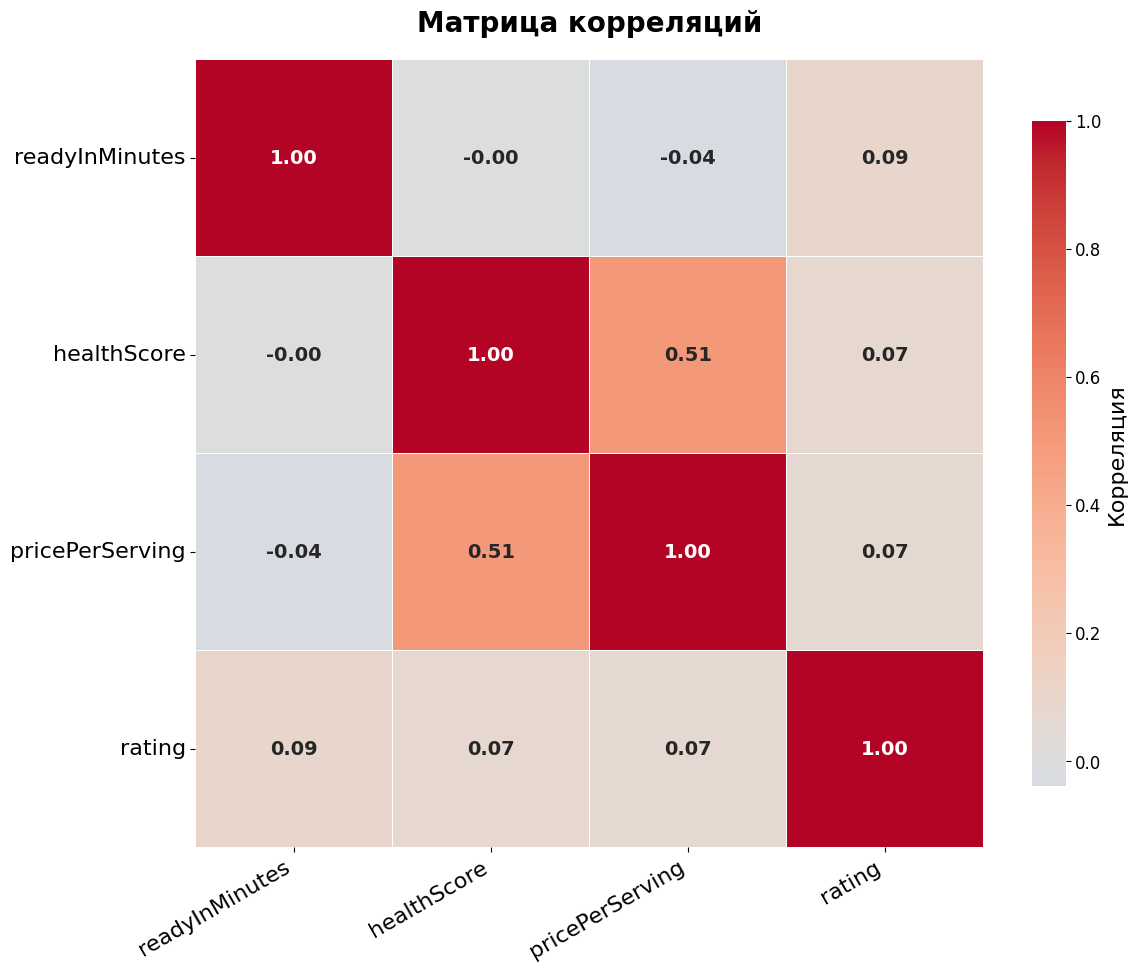

In [56]:
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            annot_kws={'size': 14, 'weight': 'bold'},
            cbar_kws={'shrink': 0.8, 'label': 'Корреляция'})

plt.title('Матрица корреляций', fontsize=20, pad=20, weight='bold')
plt.xticks(rotation=30, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)

cbar = plt.gcf().axes[-1]
cbar.yaxis.label.set_size(16)
cbar.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Анализ зависимостей между вегетарианством, популярностью блюда и рейтингом

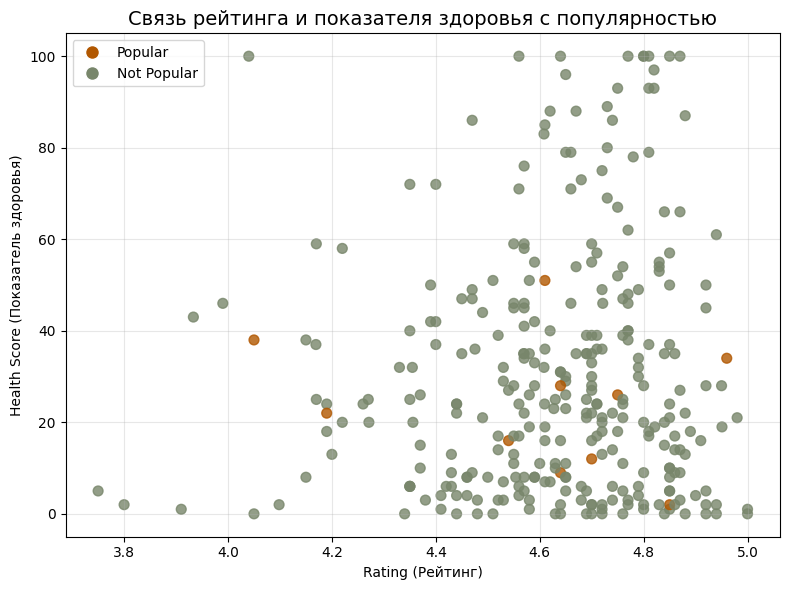

In [57]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df['rating'], df['healthScore'],
                     c=df['veryPopular'].map({True: '#B15700', False: '#78866b'}),
                     s=50, alpha=0.8)

plt.title('Связь рейтинга и показателя здоровья с популярностью', fontsize=14)
plt.xlabel('Rating (Рейтинг)')
plt.ylabel('Health Score (Показатель здоровья)')
plt.grid(True, alpha=0.3)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B15700', markersize=10, label='Popular'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#78866b', markersize=10, label='Not Popular')])
plt.tight_layout()
plt.show()

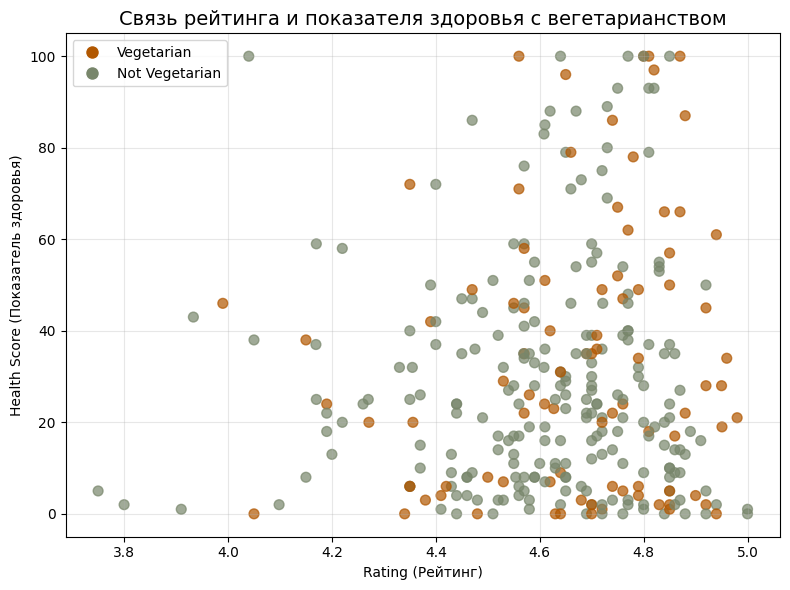

In [58]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df['rating'], df['healthScore'],
                     c=df['vegetarian'].map({True: '#B15700', False: '#78866b'}),
                     s=50, alpha=0.7)

plt.title('Связь рейтинга и показателя здоровья с вегетарианством', fontsize=14)
plt.xlabel('Rating (Рейтинг)')
plt.ylabel('Health Score (Показатель здоровья)')
plt.grid(True, alpha=0.3)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B15700', markersize=10, label='Vegetarian'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#78866b', markersize=10, label='Not Vegetarian')])
plt.tight_layout()
plt.show()

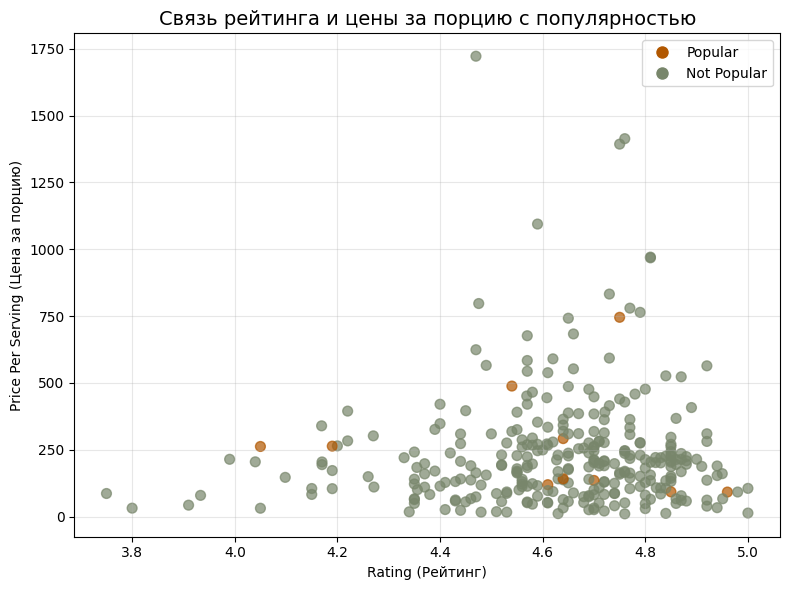

In [59]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df['rating'], df['pricePerServing'],
                     c=df['veryPopular'].map({True: '#B15700', False: '#78866b'}),
                     s=50, alpha=0.7)

plt.title('Связь рейтинга и цены за порцию с популярностью', fontsize=14)
plt.xlabel('Rating (Рейтинг)')
plt.ylabel('Price Per Serving (Цена за порцию)')
plt.grid(True, alpha=0.3)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B15700', markersize=10, label='Popular'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#78866b', markersize=10, label='Not Popular')])
plt.tight_layout()
plt.show()

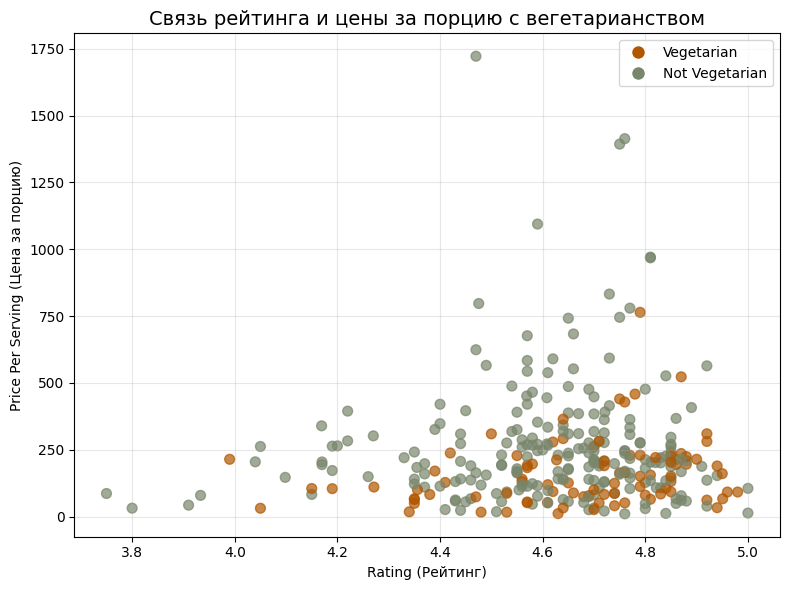

In [60]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df['rating'], df['pricePerServing'],
                     c=df['vegetarian'].map({True: '#B15700', False: '#78866b'}),
                     s=50, alpha=0.7)

plt.title('Связь рейтинга и цены за порцию с вегетарианством', fontsize=14)
plt.xlabel('Rating (Рейтинг)')
plt.ylabel('Price Per Serving (Цена за порцию)')
plt.grid(True, alpha=0.3)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B15700', markersize=10, label='Vegetarian'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#78866b', markersize=10, label='Not Vegetarian')])
plt.tight_layout()
plt.show()

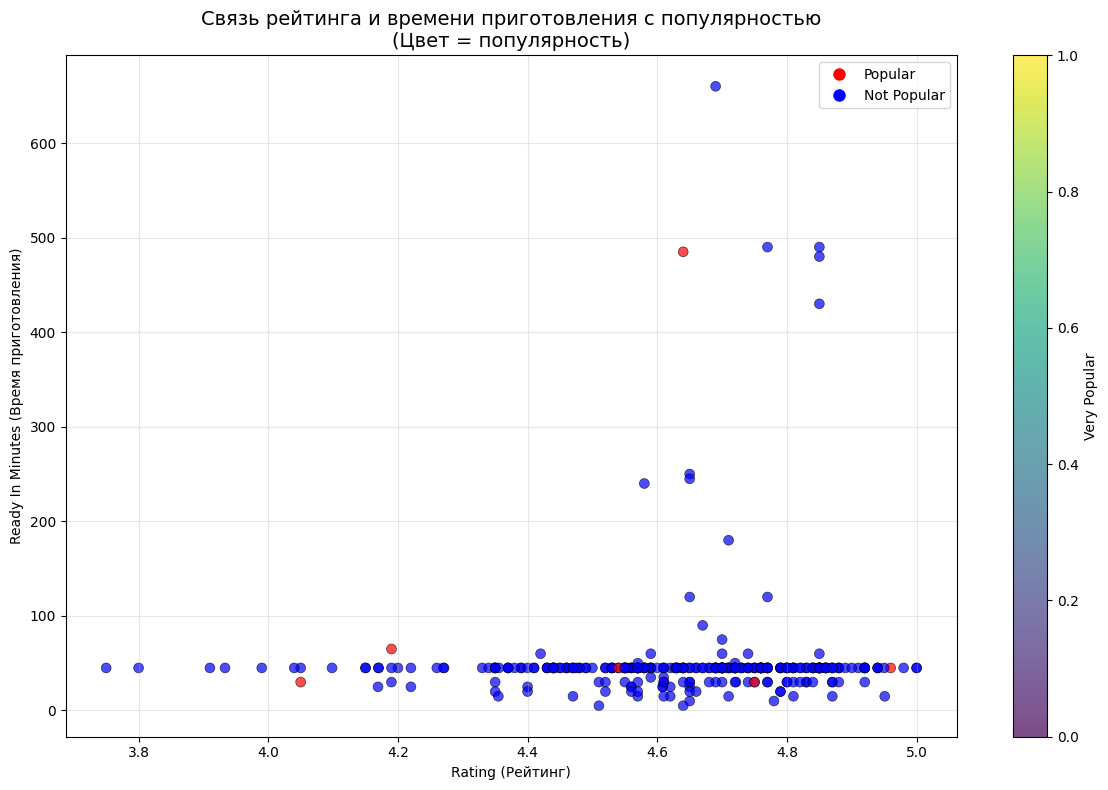

In [61]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df['rating'], df['readyInMinutes'],
                     c=df['veryPopular'].map({True: 'red', False: 'blue'}),
                     s=50, alpha=0.7, edgecolors='black', linewidth=0.5)

plt.colorbar(scatter, label='Very Popular')
plt.title('Связь рейтинга и времени приготовления с популярностью\n(Цвет = популярность)', fontsize=14)
plt.xlabel('Rating (Рейтинг)')
plt.ylabel('Ready In Minutes (Время приготовления)')
plt.grid(True, alpha=0.3)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Popular'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Not Popular')])
plt.tight_layout()
plt.show()

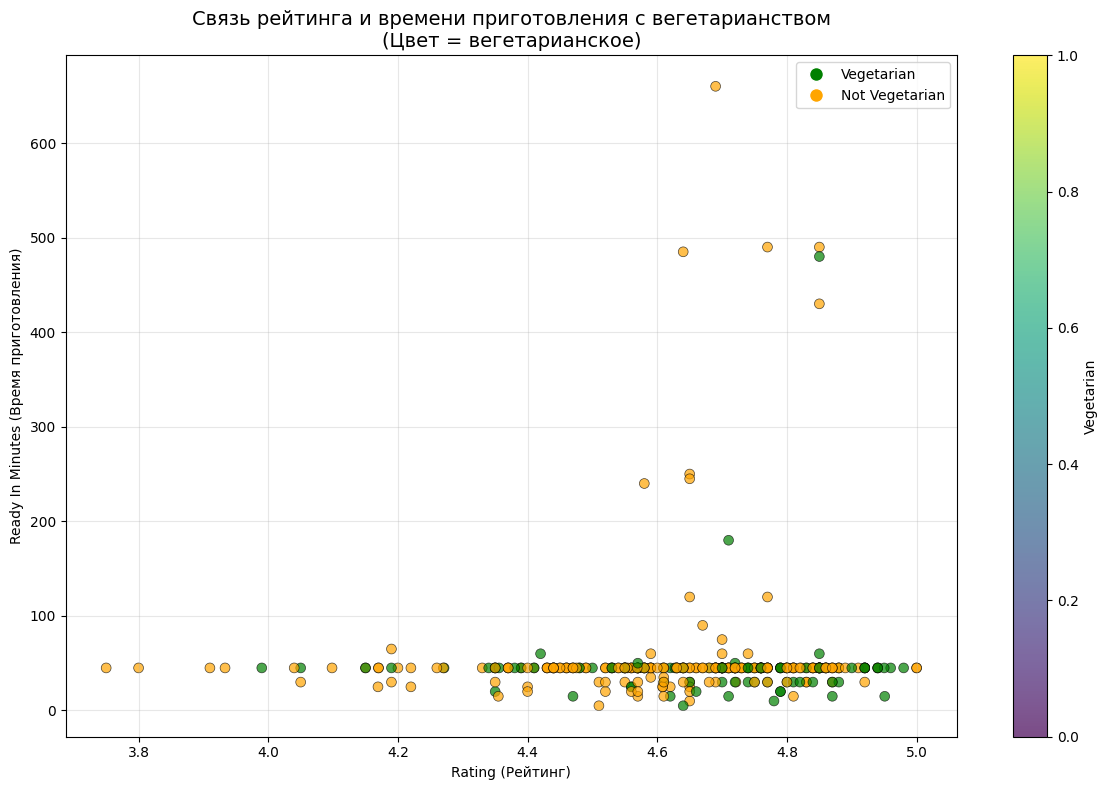

In [62]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df['rating'], df['readyInMinutes'],
                     c=df['vegetarian'].map({True: 'green', False: 'orange'}),
                     s=50, alpha=0.7, edgecolors='black', linewidth=0.5)

plt.colorbar(scatter, label='Vegetarian')
plt.title('Связь рейтинга и времени приготовления с вегетарианством\n(Цвет = вегетарианское)', fontsize=14)
plt.xlabel('Rating (Рейтинг)')
plt.ylabel('Ready In Minutes (Время приготовления)')
plt.grid(True, alpha=0.3)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Vegetarian'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Not Vegetarian')])
plt.tight_layout()
plt.show()

# Анализ зависимости рейтинга от категории блюда

/tmp/ipython-input-103770688.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_stats.index, rotation=45, ha='right')


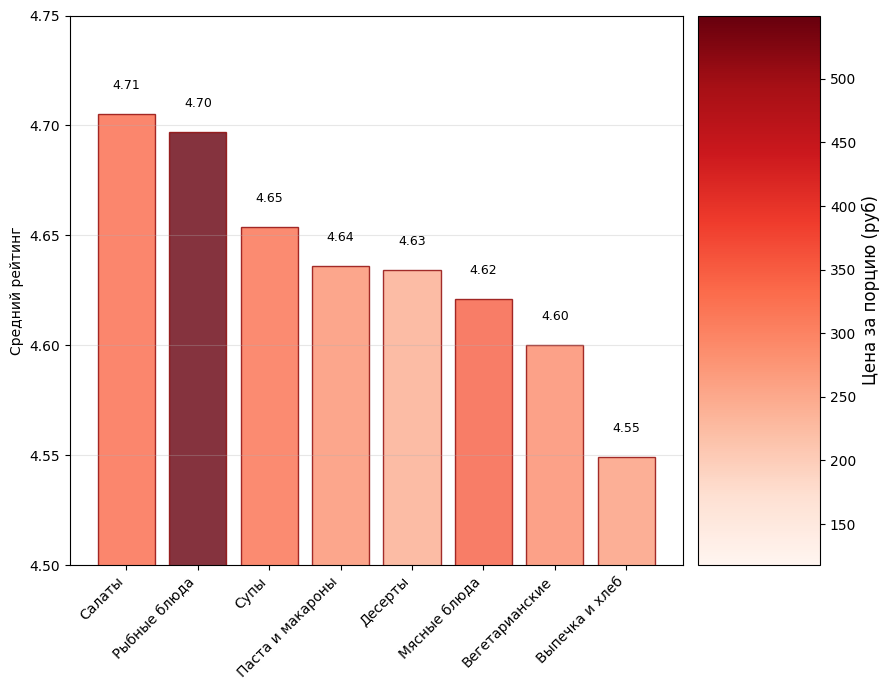

In [63]:
dish_categories = {
    'Мясные блюда': ['chicken', 'beef', 'pork', 'steak', 'ribs', 'bacon', 'lamb', 'veal', 'meat'],
    'Супы': ['soup', 'stew', 'chili'],
    'Десерты': ['cake', 'cookie', 'pie', 'cheesecake', 'dessert', 'pudding', 'muffin', 'brownie'],
    'Салаты': ['salad', 'salad wraps'],
    'Выпечка и хлеб': ['bread', 'bun', 'muffin', 'cake', 'pie', 'roll', 'pastry'],
    'Паста и макароны': ['pasta', 'noodle', 'spaghetti', 'ravioli', 'macaroni', 'fettuccini'],
    'Рыбные блюда': ['fish', 'salmon', 'tuna', 'cod', 'seafood', 'crab', 'prawn', 'scallop'],
    'Вегетарианские': ['vegetable', 'vegan', 'tofu', 'bean', 'lentil', 'chickpea', 'quinoa']
}

def categorize_dish(title):
    if not isinstance(title, str):
        return None
    title_lower = title.lower()
    for category, keywords in dish_categories.items():
        if any(keyword in title_lower for keyword in keywords):
            return category
    return None

df['category'] = df['title'].apply(categorize_dish)
df_filtered = df.dropna(subset=['category'])

category_stats = df_filtered.groupby('category').agg({
    'rating': 'mean',
    'pricePerServing': 'mean'
}).round(3)

category_stats = category_stats.sort_values('rating', ascending=False)

prices = category_stats['pricePerServing'].values
colors = [plt.cm.Reds(0.3 + 0.7 * (p - prices.min()) / (prices.max() - prices.min())) for p in prices]

fig, (ax, cax) = plt.subplots(1, 2, figsize=(9, 7), gridspec_kw={'width_ratios': [5, 1]})

bars = ax.bar(category_stats.index, category_stats['rating'], color=colors, edgecolor='darkred', alpha=0.8)
ax.set_ylabel('Средний рейтинг')
ax.set_xticklabels(category_stats.index, rotation=45, ha='right')
ax.set_ylim(4.5, 4.75)
ax.grid(True, alpha=0.3, axis='y')

for bar, rating in zip(bars, category_stats['rating']):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01, f'{rating:.2f}',
            ha='center', va='bottom', fontsize=9)

norm = mpl.colors.Normalize(vmin=prices.min(), vmax=prices.max())
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'), cax=cax)
cbar.set_label('Цена за порцию (руб)', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3900895831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(stats.index, rotation=45, ha='right')


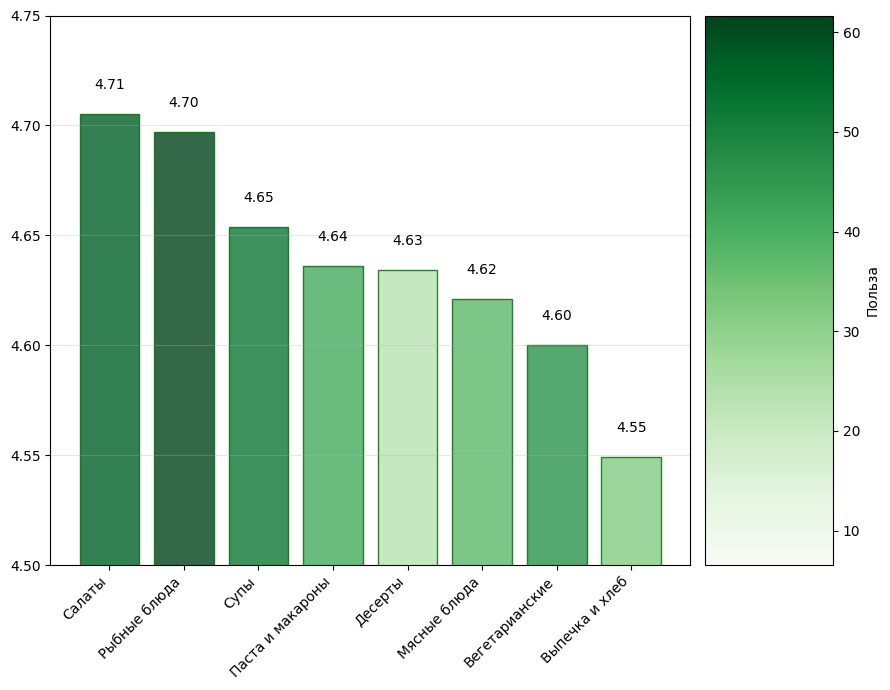

In [64]:
stats = df.dropna().groupby('category')[['rating', 'healthScore']].mean().round(3).sort_values('rating', ascending=False)

fig, (ax, cax) = plt.subplots(1, 2, figsize=(9, 7), gridspec_kw={'width_ratios': [5, 1]})

health = stats['healthScore']
colors = plt.cm.Greens((health - health.min()) / (health.max() - health.min()) * 0.7 + 0.3)

bars = ax.bar(stats.index, stats['rating'], color=colors, edgecolor='darkgreen', alpha=0.8)
ax.set_xticklabels(stats.index, rotation=45, ha='right')
ax.set_ylim(4.5, 4.75)
ax.grid(True, alpha=0.3, axis='y')

for bar, r in zip(bars, stats['rating']):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01, f'{r:.2f}', ha='center', va='bottom')

fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(health.min(), health.max()), cmap='Greens'), cax=cax).set_label('Польза')

plt.tight_layout()
plt.show()

**Анализ рейтингов по кулинарным категориям**

Лидеры по качеству — салаты и рыбные блюда демонстрируют наивысшие оценки пользователей (4.705 и 4.697 соответственно), что свидетельствует о стабильно высоком качестве этих категорий.

Массовые предпочтения — мясные блюда составляют ядро кулинарной базы (108 рецептов), подтверждая их традиционную популярность, однако их средний рейтинг несколько ниже лидеров (4.621).

Ценовая диспропорция — рыбные блюда значительно дороже других категорий (550 рублей за порцию), что может быть связано с стоимостью морепродуктов, но не мешает им получать высокие оценки.

Баланс пользы и вкуса — салаты и рыбные блюда лидируют не только по рейтингу, но и по показателям здоровья (54.7 и 61.7), доказывая возможность сочетания вкусовых качеств и пользы.

Экономичные категории — десерты и выпечка предлагают наиболее доступные варианты (118 и 148 рублей) при сохранении достойного качества.

Вывод: Пользователи одинаково высоко ценят как легкие и полезные блюда (салаты, рыба), так и традиционные мясные рецепты, формируя сбалансированную кулинарную экосистему с разнообразными ценовыми и временными вариантами.

# Анализ зависимости рейтинга от времени приготовления

/tmp/ipython-input-1522372990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='readyInMinutes', y='rating',
/tmp/ipython-input-1522372990.py:10: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df_filtered, x='readyInMinutes', y='rating',


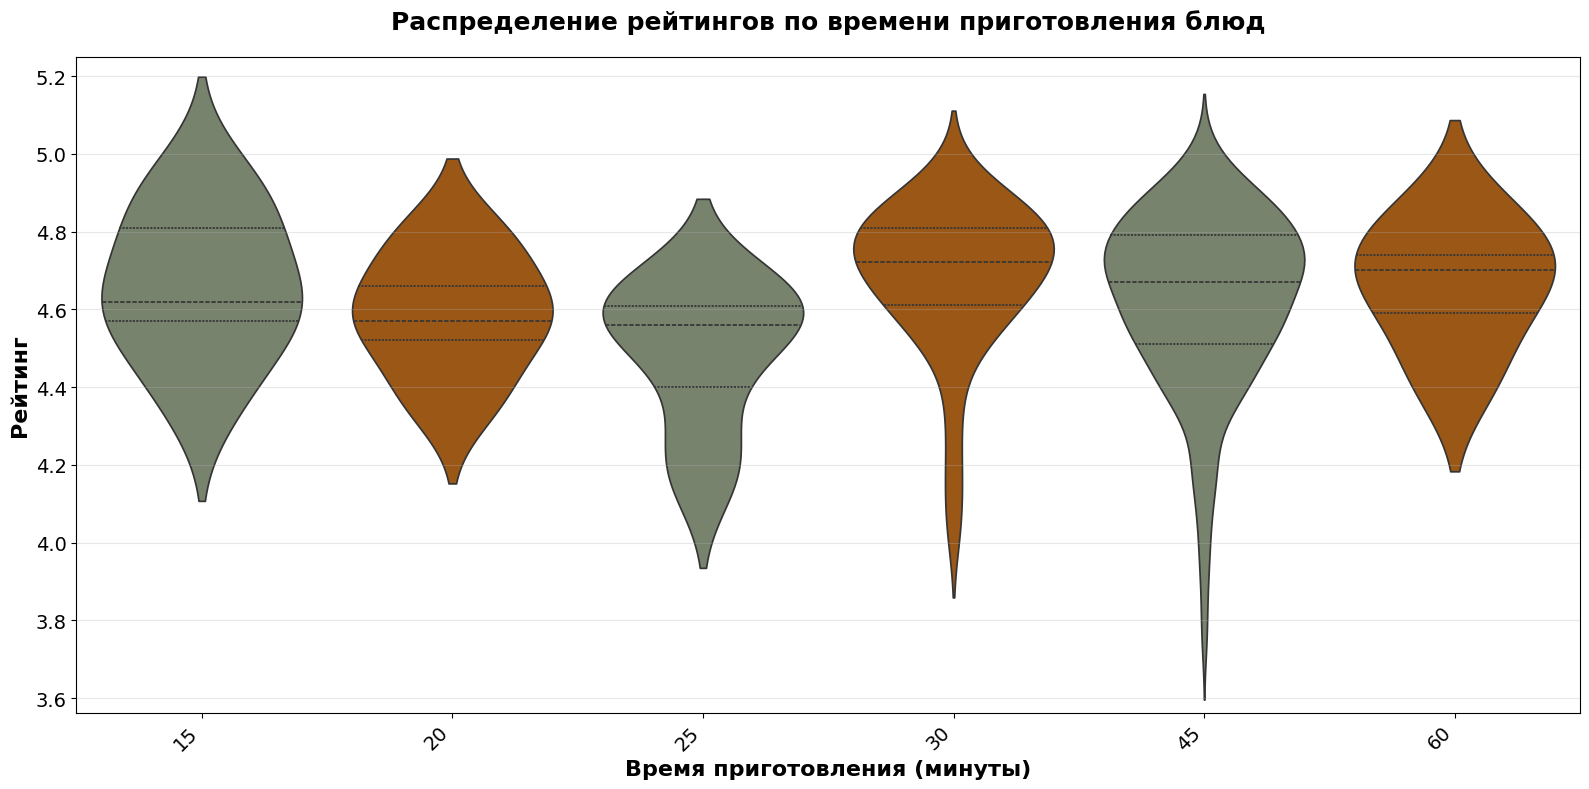

In [65]:
time_counts = df['readyInMinutes'].value_counts()
valid_times = time_counts[time_counts > 2].index

df_filtered = df[df['readyInMinutes'].isin(valid_times)]

custom_palette = ['#78866b', '#B15700']

plt.figure(figsize=(16, 8))
sns.violinplot(data=df_filtered, x='readyInMinutes', y='rating',
               palette=custom_palette, inner='quartile')

plt.xlabel('Время приготовления (минуты)', fontsize=16, weight='bold')
plt.ylabel('Рейтинг', fontsize=16, weight='bold')
plt.title('Распределение рейтингов по времени приготовления блюд',
          fontsize=18, pad=20, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.3)

plt.ylim(df_filtered['rating'].min() * 0.95, df_filtered['rating'].max() * 1.05)

plt.tight_layout()
plt.show()



Из графика можно сделать вывод, что для времени приготовления 15 минут концентрация более высоких оценок значительно выше, что свидетельствует о популярности быстрых рецептов среди пользователей. Следовательно, в приложение стоит добавлять больше быстрых и простых рецептов, так как они больше привлекают пользователей и получают более высокие оценки. Для времени приготовления от 30 до 60 минут медиана значений расположена выше, что говорит о надежности таких рецептов.

# Анализ бинарных признаков

/tmp/ipython-input-3667779375.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot([df[df['veryPopular'] == False]['rating'],
/tmp/ipython-input-3667779375.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot([df[df['vegetarian'] == False]['rating'],


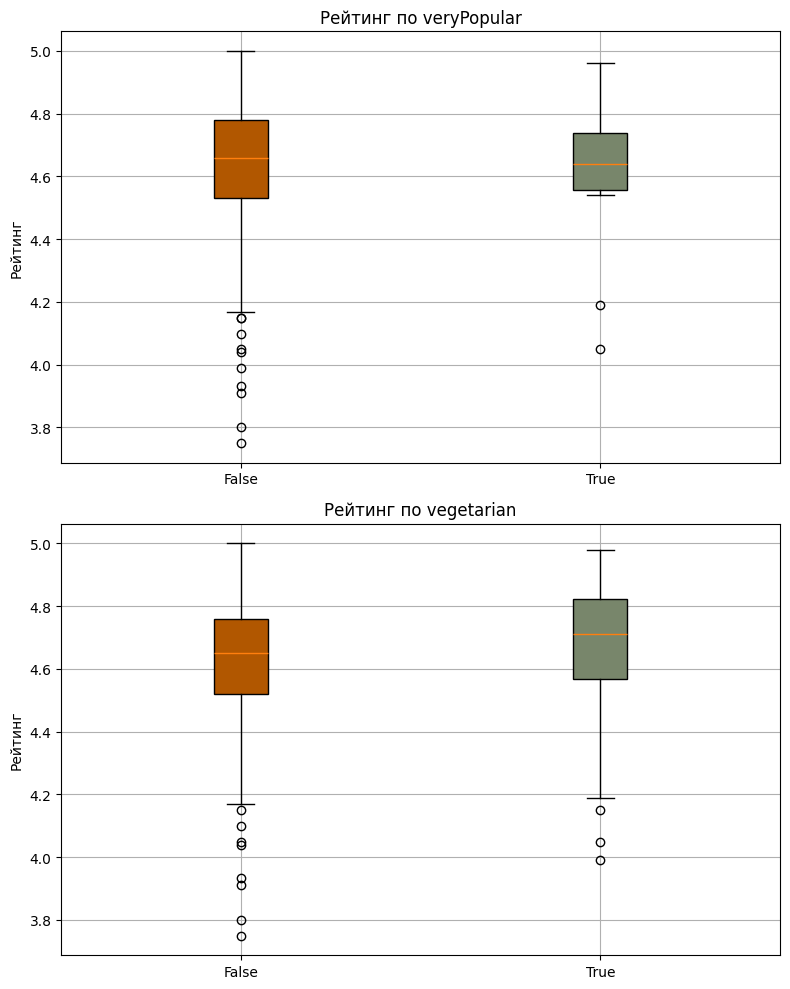

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

bp1 = ax1.boxplot([df[df['veryPopular'] == False]['rating'],
                   df[df['veryPopular'] == True]['rating']],
                  labels=['False', 'True'], patch_artist=True)
bp1['boxes'][0].set_facecolor('#B15700')
bp1['boxes'][1].set_facecolor('#78866b')
ax1.set_title('Рейтинг по veryPopular')
ax1.set_ylabel('Рейтинг')
ax1.grid(True)

bp2 = ax2.boxplot([df[df['vegetarian'] == False]['rating'],
                   df[df['vegetarian'] == True]['rating']],
                  labels=['False', 'True'], patch_artist=True)
bp2['boxes'][0].set_facecolor('#B15700')
bp2['boxes'][1].set_facecolor('#78866b')
ax2.set_title('Рейтинг по vegetarian')
ax2.set_ylabel('Рейтинг')
ax2.grid(True)

plt.tight_layout()
plt.show()

Схожесть средних оценок при разном распределении — медианный рейтинг популярных и непопулярных рецептов практически одинаков, однако популярные блюда демонстрируют стабильно высокое качество с минимальным разбросом оценок и почти полным отсутствием низких баллов. Таким образом, ключевое отличие популярных рецептов заключается не в более высоком среднем рейтинге, а в предсказуемо высоком результате, что снижает риски для пользователей при выборе и формирует их лояльность.

Незначительное преимущество вегетарианской кухни — вегетарианские рецепты показывают чуть более высокий средний балл, что может свидетельствовать о хорошем качестве растительных блюд на платформе.


# Анализ показателя полезности блюда

/tmp/ipython-input-1198929733.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='readyInMinutes',


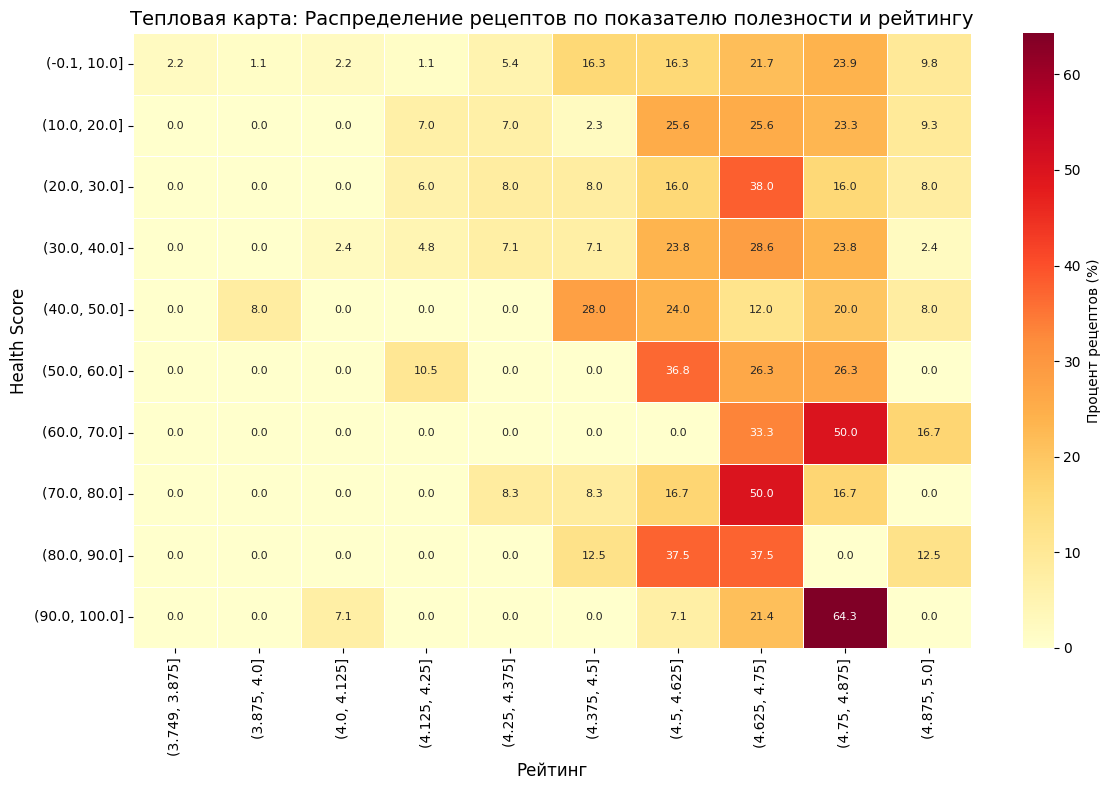

In [67]:
df['health_bin'] = pd.cut(df['healthScore'], bins=10)
df['rating_bin'] = pd.cut(df['rating'], bins=10)

pivot_table = df.pivot_table(values='readyInMinutes',
                            index='health_bin',
                            columns='rating_bin',
                            aggfunc='count',
                            fill_value=0)

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_percentage,
            annot=True,
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Процент рецептов (%)'},
            linewidths=0.5,
            annot_kws={'size': 8})
plt.title('Тепловая карта: Распределение рецептов по показателю полезности и рейтингу', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Health Score', fontsize=12)
plt.tight_layout()
plt.show()

Анализируя график, можно сделать вывод, что почти все блюда с высоким показателем полезности имеют стабильно высокий рейтинг. А с уменьшением показателя полезности оценки пользователей имеют больший разброс. Соответсвенно, в приложение стоит добавлять больше рецептов с высоким коэффициентов поезности.

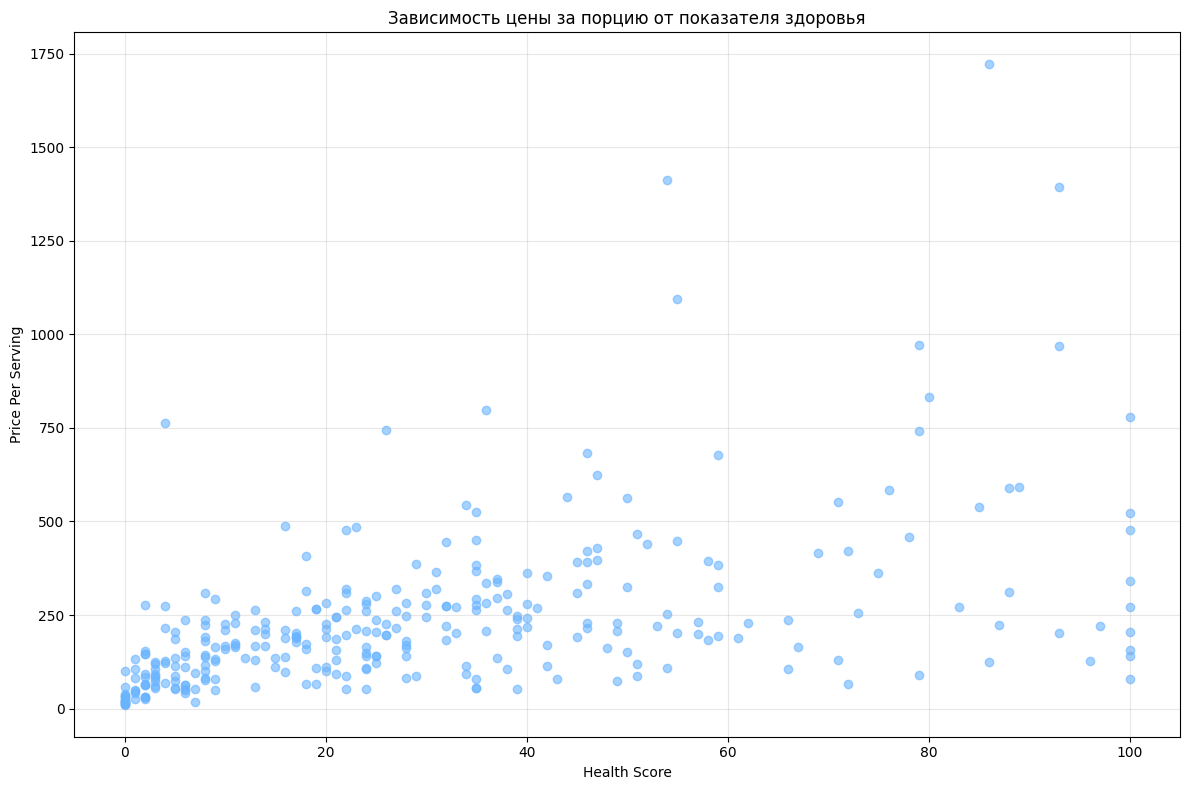

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(df['healthScore'], df['pricePerServing'], alpha=0.6, color='#69B4FF')
plt.title('Зависимость цены за порцию от показателя здоровья')
plt.xlabel('Health Score')
plt.ylabel('Price Per Serving')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Умеренная прямая зависимость — корреляция 0.508 свидетельствует о заметной связи между полезностью и стоимостью блюд.

Тренд на удорожание здорового питания — более полезные рецепты в среднем требуют больших финансовых затрат, что отражает реальную рыночную ситуацию.

# Анализ стоимости порции

/tmp/ipython-input-2418531483.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating = df.groupby('price_range')['rating'].mean()


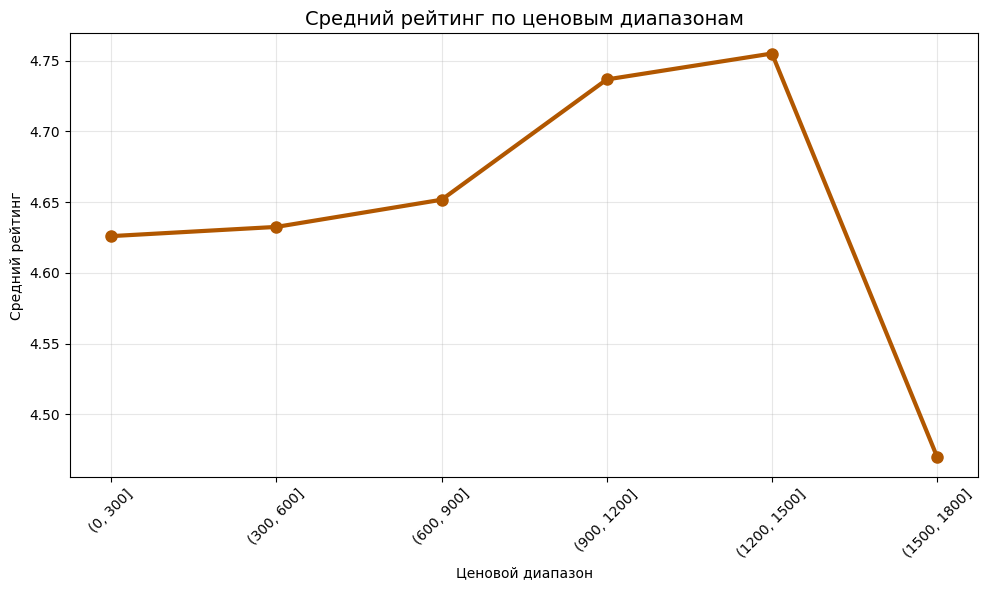

In [69]:
df['price_range'] = pd.cut(df['pricePerServing'], bins=[0, 300, 600, 900, 1200, 1500, 1800])

price_rating = df.groupby('price_range')['rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(price_rating.index.astype(str), price_rating.values, marker='o', color='#B15700', linewidth=3, markersize=8)
plt.title('Средний рейтинг по ценовым диапазонам', fontsize=14)
plt.xlabel('Ценовой диапазон')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Основные выводы:**

Бюджетный сегмент — стабильное качество — блюда стоимостью от 0 до 900 рублей демонстрируют устойчиво высокий рейтинг, что подтверждает их надежность и соответствие ожиданиям пользователей.

Премиум-сегмент — максимальное удовлетворение — рецепты ценой от 900 до 1500 рублей показывают наивысшие оценки, что свидетельствует об оправданности затрат на качественные ингредиенты и сложные техники приготовления.

Элитный сегмент — завышенные ожидания — блюда стоимостью от 1500 до 1800 рублей получают наиболее низкие оценки, вероятно, из-за несоответствия цены и получаемого вкусового опыта.

# Анализ состава блюд

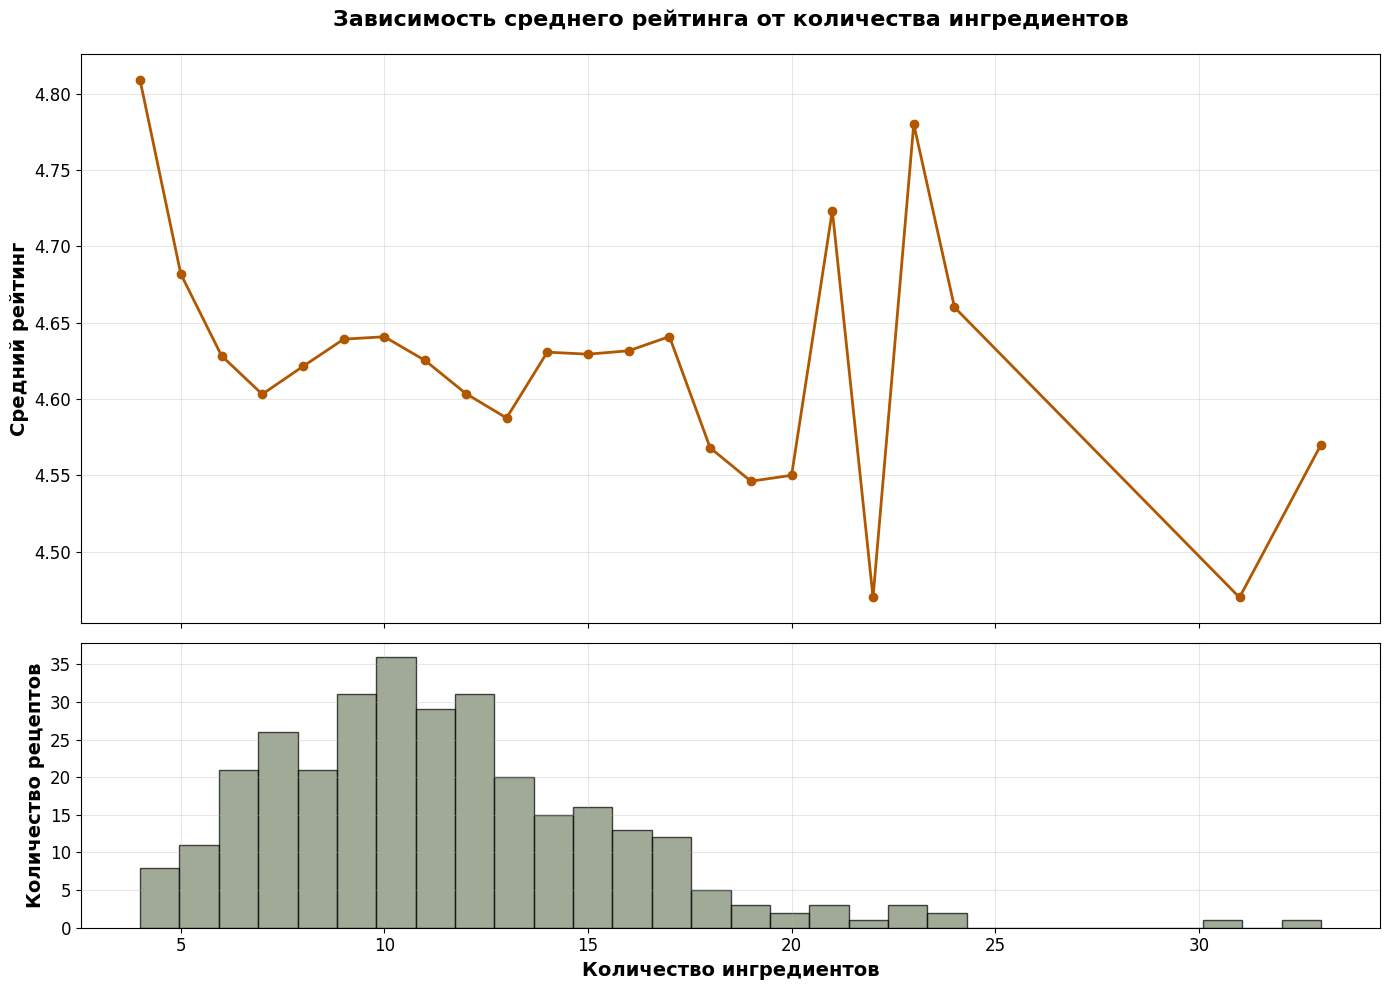

In [70]:
df_with_count = df.copy()
df_with_count['ingredients_count'] = df_with_count['ingredients'].apply(
    lambda x: len(eval(x)) if pd.notna(x) and isinstance(x, str) else 0
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10),
                                gridspec_kw={'height_ratios': [2, 1]})

rating_by_ingredients = df_with_count.groupby('ingredients_count')['rating'].mean().reset_index()

ax1.plot(rating_by_ingredients['ingredients_count'],
         rating_by_ingredients['rating'],
         marker='o', linewidth=2, markersize=6, color='#B15700')
ax1.set_ylabel('Средний рейтинг', fontsize=14, weight='bold')
ax1.set_title('Зависимость среднего рейтинга от количества ингредиентов', fontsize=16, pad=20, weight='bold')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', labelbottom=False, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax2.hist(df_with_count['ingredients_count'], bins=30, alpha=0.7, color='#78866b', edgecolor='black')
ax2.set_xlabel('Количество ингредиентов', fontsize=14, weight='bold')
ax2.set_ylabel('Количество рецептов', fontsize=14, weight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

Количество ингредиентов практически не влияет на рейтинг блюд — сложные рецепты не получают более высоких оценок. Наблюдается даже слабая отрицательная корреляция: с ростом числа компонентов оценки слегка снижаются. Это говорит о том, что пользователи ценят не многосоставность, а сбалансированность вкуса и доступность приготовления. Успех рецепта определяется качеством, а не количеством.

# Анализ зависимости рейтинга от показателя полезности и цены за порцию

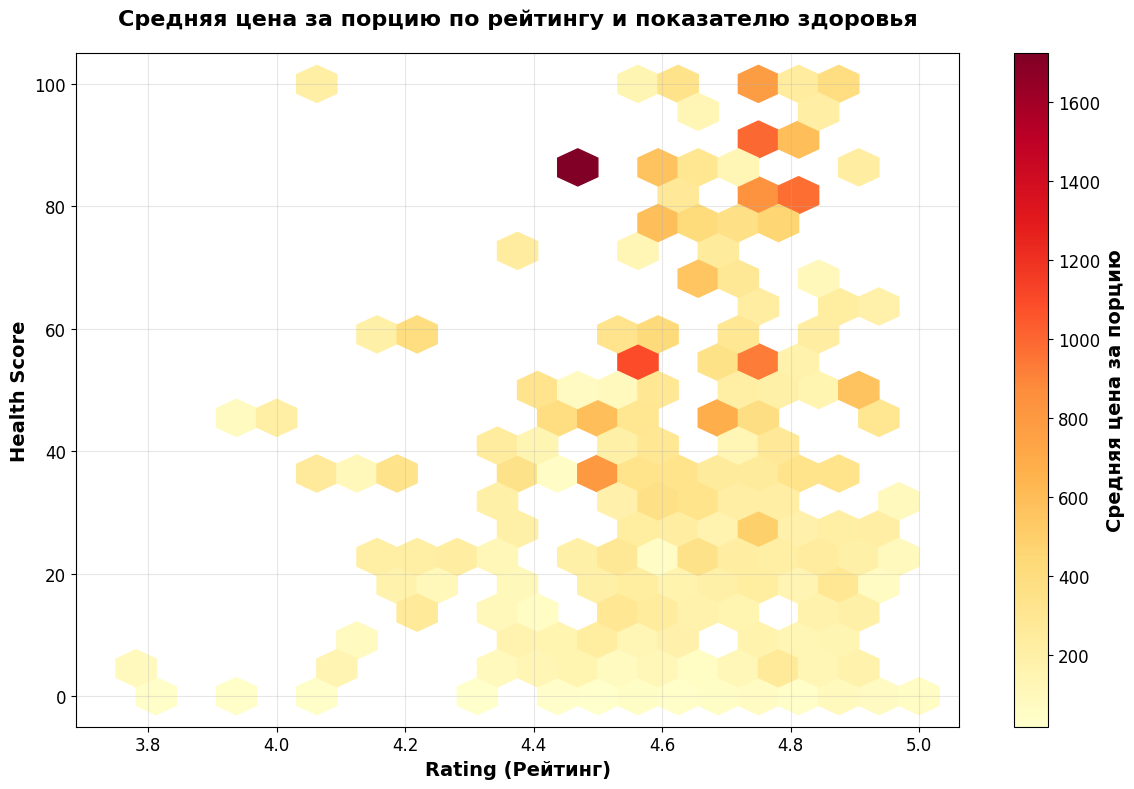

In [72]:
plt.figure(figsize=(12, 8))

hexbin = plt.hexbin(df['rating'], df['healthScore'],
                   C=df['pricePerServing'],
                   reduce_C_function=np.mean,
                   gridsize=20,
                   cmap='YlOrRd')

cbar = plt.colorbar(hexbin, label='Средняя цена за порцию')
cbar.set_label('Средняя цена за порцию', fontsize=14, weight='bold')
cbar.ax.tick_params(labelsize=12)

plt.title('Средняя цена за порцию по рейтингу и показателю здоровья', fontsize=16, weight='bold', pad=20)
plt.xlabel('Rating (Рейтинг)', fontsize=14, weight='bold')
plt.ylabel('Health Score', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Из графика можно сделать вывод, что наиболее высокие оценки (4.7 - 5.0) получают блюда с низким показателем полезности и относительно низкой средней ценой за порцию. Соответственно, если в приложение добавляется рецепт с низким показателем полезности (<50), цена за порцию должна быть так же достаточно низкой (<400 руб). Это можно объяснить тем, что пользователи не готовы переплачивать за продукты для приготовления неполезной еды.